# To Do List Strategy using Monte Carlo

In [2]:
from recordtype import recordtype
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# We create a tuple with the following parameters
Task = recordtype('Task','weight duration due done')

In [74]:
# This function creates the task where the due date is created at random
# Duration is due-1 and weights are again random
# Easiness is assumed on the basis of duration
def create_tasks(num):
    tasks = []
    dist = np.round(np.random.exponential(5,10000))
    for i in range(num):
        due = np.random.choice(dist)+1
        weight = np.random.randint(1,100)
        duration = np.random.randint(0,due)
#         print(due,weight,duration)
        t = Task(weight=weight, duration = duration, due=due,done=0)
        tasks.append(t)
    return tasks

We check how many important tasks are completed. Important Tasks are those which are top 75% of all tasks

In [73]:
def tally(comp_task,all_task):
    completed = len(comp_task)/len(all_task)
    
#     we set 75th percentile of all tasks based on weight as important tasks
    percentile = int(0.75*len(all_task))
    imp_tasks = sorted(all_task, key = lambda x: x.weight)[percentile:len(all_task)]
    
#     check how many important tasks are completed
    overlap = 0
    for i in imp_tasks:
        if i in comp_task:
            overlap += 1
    if len(imp_tasks) > 0:
        important = overlap/len(imp_tasks)
    else:
        important = 0
    
    intime = []
    for i in comp_task:
        if i.due >= i.done:
            intime.append(i)
    intime_task = len(intime)/len(all_task)
    
    return (completed,important,intime_task)

In [78]:
def duration(t):
    return t.duration
# Deadline is the number of days it takes to complete all the tasks
#  Elapsed time is the running counter
def simulate(ratio,*tasks):
    deadline = ratio *sum(list(map(duration,tasks)))
    completed_tasks = []
    elapsed_time = 0
    for task in tasks:
        elapsed_time += task.duration
        if elapsed_time <= deadline:
            task.done = elapsed_time
            completed_tasks.append(task)
        else:
            break
    return tally(completed_tasks,tasks)

## Monte Carlo Sampling
Now we run many simulations and average out the performance.
This is the entire basis of Monte Carlo sampling
We can chose to do other types of sampling

In [79]:
def add(a, b): return tuple(map(lambda x, y: x + y, a, b))
def divide(a,b) : return tuple([x/b for x in a])


def run(ratio,iterations,num,algo):
    results,final = (0,0,0),(0,0,0)
    for i in range(iterations):
        tasks = create_tasks(num)
        results = simulate(ratio, *tuple(algo(*tasks)))
        final = add(final,results)
    return divide(final,iterations)
def print_results(data):
    params = ("- tasks completed",
              "- important tasks completed",
              "- tasks completed in time")
    for d,p in zip(data, params):
        print("{0:s} : {1:3.2f}%".format(p.ljust(40, ' '), d*100))

In [71]:
# Different Algorithms 
def as_they_come(*tasks):
    return tasks
def due_first(*tasks):
    return sorted(tasks,key=lambda x:x.due)
def due_last(*tasks):
    return sorted(tasks,key=lambda x:x.due,reverse=True)
def important_first(*tasks):
    return sorted(tasks, key=lambda x: x.weight, reverse=True) 

def easier_first(*tasks):
    return sorted(tasks, key=lambda x: x.duration)
def easier_last(*tasks):
    return sorted(tasks, key=lambda x: x.duration,reverse=True)

def easier_important_first(*tasks):
    return sorted(tasks, key=lambda x: x.duration/x.weight)

def easier_due_first(*tasks):
    return sorted(tasks, key=lambda x: x.duration/x.due)

Do as they come
- tasks completed                        : 48.60%
- important tasks completed              : 47.86%
- tasks completed in time                : 11.74%

Due tasks first
- tasks completed                        : 77.94%
- important tasks completed              : 77.79%
- tasks completed in time                : 28.68%

Due tasks last
- tasks completed                        : 18.35%
- important tasks completed              : 18.51%
- tasks completed in time                : 6.74%

Important tasks first
- tasks completed                        : 48.91%
- important tasks completed              : 99.11%
- tasks completed in time                : 11.96%

Easier tasks first
- tasks completed                        : 83.37%
- important tasks completed              : 83.00%
- tasks completed in time                : 46.77%

Easiest Task last
- tasks completed                        : 12.86%
- important tasks completed              : 12.40%
- tasks completed in time               

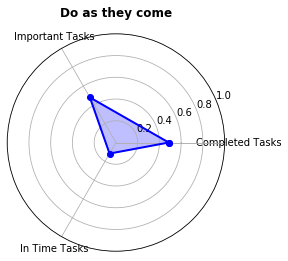

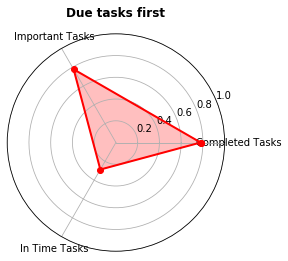

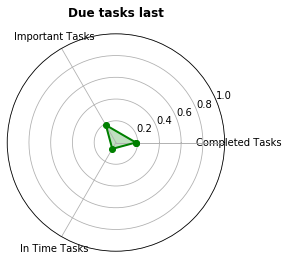

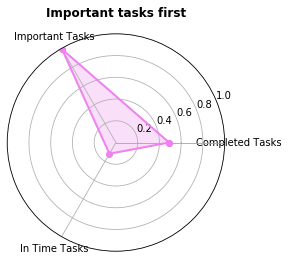

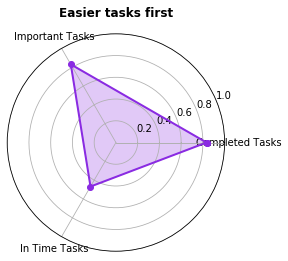

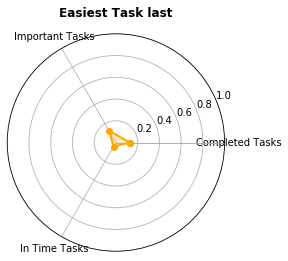

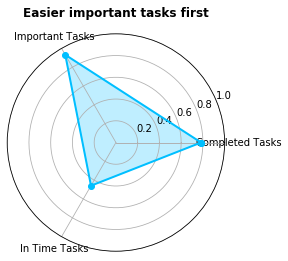

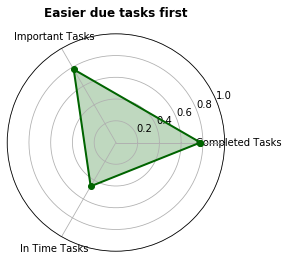

In [80]:
import matplotlib.pyplot as plt

def chart(data, title):
    labels=np.array(['Completed Tasks', 'Important Tasks', 'In Time Tasks'])
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    angles=np.concatenate((angles,[angles[0]]))    
    
    colors = ['blue', 'red', 'green', 'violet', 'blueviolet', 'orange', 'deepskyblue', 'darkgreen'
             ,'pink']
    for d, t, c in zip(data, title, colors):
        fig=plt.figure()
        d=np.concatenate((d,[d[0]]))
        ax = fig.add_subplot(111, polar=True)
        ax.set_title(t, weight='bold', size='large')      
        ax.plot(angles, d, 'o-', linewidth=2, color=c)
        
        ax.fill(angles, d, alpha=0.25, color=c)
        ax.set_thetagrids(angles * 180/np.pi, labels)
        ax.set_ylim(0,1.0)
        ax.grid(True)
        plt.savefig(t)
        
        
# deadline ratio
ratio = 0.5
# number of iterations to run
iterations = 1000
# no of tasks
num = 25

algorithms = (as_they_come,
              due_first,
              due_last,
              important_first,
              easier_first,
              easier_last,
              easier_important_first,
              easier_due_first)

labels = ("Do as they come", 
           "Due tasks first", 
           "Due tasks last",
           "Important tasks first", 
           "Easier tasks first",
          "Easiest Task last",
           "Easier important tasks first",
           "Easier due tasks first")

data = []

# run the simulation for each algorithm and print out the results
for algo, label in zip(algorithms, labels):
    d = run(ratio, iterations, num, algo)
    print(label)
    print_results(d)
    data.append(d)
    print()

# also create a radar chart for each algorithm
chart(data, labels)